In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

<h1>Introducción:</h1>
<p>El siguiente dataframe esta comprendido de 4 archivos excel que muestran las estadísticas respectivas a la probabilidad de muertes en los diversos países en un período determinado de años(2000-2016) en los que vemos que se muestran variaciones tanto respectivamente a una cuestión de género como también a las variaciones producto de los lugares, es decir, en las divisiones entre los países denominados del primer mundo y el resto.<br>
Algunos de los archivos muestra también los resultados que se dan en mujeres embarazadas, muertes en partos, etc. Estos datos nos pueden también acercar a un panorama respecto a la proyección de vida en determinados lugares y también muestran de alguna manera cómo por determinados avances y otras condiciones de contexto la probabilidad de muerte comienza a ser descendente.
</p>

<h2>Primeros pasos:</h2>
<p>Primero trabajaremos con el archivo más general dentro de los 4, en este se realizará un filtrado de datos y luego las primeras visualizaciones para ver algunas de las tendencias que se puedan llegar a dar dentro de este dataframe seleccionado.</p>

In [84]:
#Primer dataframe relacionado a la mortalidad en adultos
url_mortalidad_adulta = 'Adult mortality.csv'
df_mortalidad_adulta = pd.read_csv(url_mortalidad_adulta, index_col=0)
df_mortalidad_adulta.head()

,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
Country,Year,Both sexes,Male,Female
Afghanistan,2016,245,272,216
Afghanistan,2015,233,254,210
Afghanistan,2014,234,254,213
Afghanistan,2013,235,254,215


In [85]:
df_mortalidad_adulta = df_mortalidad_adulta.reset_index()
nuevas_columnas = {
    'index': 'Pais',
    'Unnamed: 1': 'Años',
    'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)': 'Probability of dying between 15 and 60 years per 1000 population(ambos sexos)',
    'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1': 'Probability of dying between 15 and 60 years per 1000 population(masculinos)',
    'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2' : 'Probability of dying between 15 and 60 years per 1000 population(femeninos)'
}
df_mortalidad_adulta = df_mortalidad_adulta.rename(columns=nuevas_columnas)
df_mortalidad_adulta.head()

,Pais,Años,Probability of dying between 15 and 60 years per 1000 population(ambos sexos),Probability of dying between 15 and 60 years per 1000 population(masculinos),Probability of dying between 15 and 60 years per 1000 population(femeninos)
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215


In [86]:
df_mortalidad_adulta = df_mortalidad_adulta.drop(0, axis=0)
df_mortalidad_adulta.head()

,Pais,Años,Probability of dying between 15 and 60 years per 1000 population(ambos sexos),Probability of dying between 15 and 60 years per 1000 population(masculinos),Probability of dying between 15 and 60 years per 1000 population(femeninos)
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215
5,Afghanistan,2012,242,262,221


In [87]:
#Convertimos los valores de las columnas object a sus valores correspondientes
df_mortalidad_adulta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 1 to 3111
Data columns (total 5 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Pais                                                                           3111 non-null   object
 1   Años                                                                           3111 non-null   object
 2   Probability of dying between 15 and 60 years per 1000 population(ambos sexos)  3111 non-null   object
 3   Probability of dying between 15 and 60 years per 1000 population(masculinos)   3111 non-null   object
 4   Probability of dying between 15 and 60 years per 1000 population(femeninos)    3111 non-null   object
dtypes: object(5)
memory usage: 121.7+ KB


In [88]:
df_mortalidad_adulta['Pais'] = df_mortalidad_adulta['Pais'].astype('string')
df_mortalidad_adulta['Años'] = df_mortalidad_adulta['Años'].astype('int')
df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'] = df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'].astype('int')
df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(masculinos)'] = df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(masculinos)'].astype('int')
df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(femeninos)'] = df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(femeninos)'].astype('int')
df_mortalidad_adulta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 1 to 3111
Data columns (total 5 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Pais                                                                           3111 non-null   string
 1   Años                                                                           3111 non-null   int32 
 2   Probability of dying between 15 and 60 years per 1000 population(ambos sexos)  3111 non-null   int32 
 3   Probability of dying between 15 and 60 years per 1000 population(masculinos)   3111 non-null   int32 
 4   Probability of dying between 15 and 60 years per 1000 population(femeninos)    3111 non-null   int32 
dtypes: int32(4), string(1)
memory usage: 73.0 KB


In [89]:
df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'] = df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'].apply(lambda x: (x * 100) / 1000)
df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(masculinos)'] = df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(masculinos)'].apply(lambda x: (x * 100) / 1000)
df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(femeninos)'] = df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(femeninos)'].apply(lambda x: (x * 100) / 1000)
df_mortalidad_adulta.head()

,Pais,Años,Probability of dying between 15 and 60 years per 1000 population(ambos sexos),Probability of dying between 15 and 60 years per 1000 population(masculinos),Probability of dying between 15 and 60 years per 1000 population(femeninos)
1,Afghanistan,2016,24.5,27.2,21.6
2,Afghanistan,2015,23.3,25.4,21.0
3,Afghanistan,2014,23.4,25.4,21.3
4,Afghanistan,2013,23.5,25.4,21.5
5,Afghanistan,2012,24.2,26.2,22.1


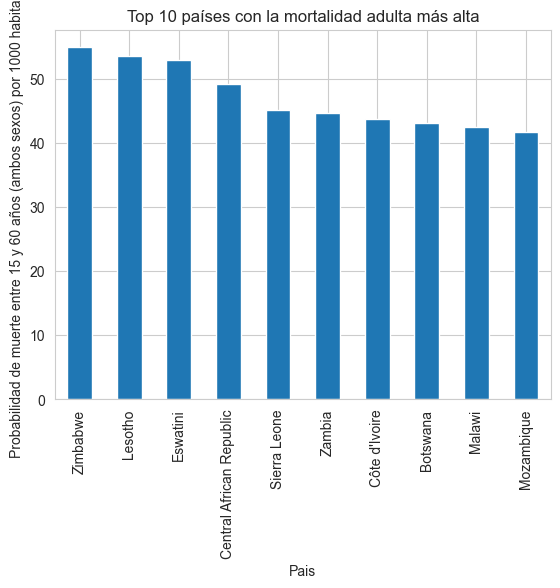

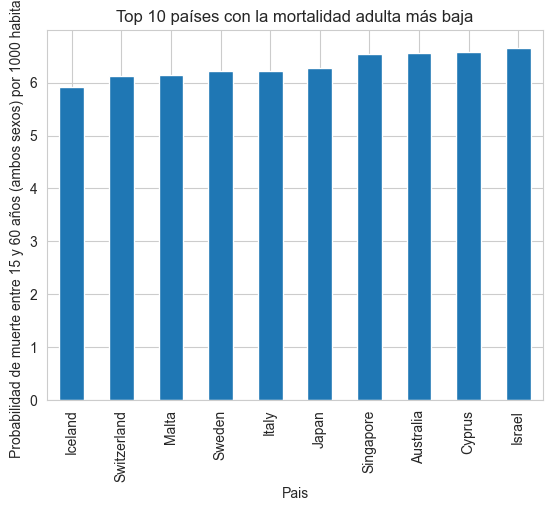

In [90]:
# Top 10 países con la mortalidad adulta más alta
top10_mas_altos = df_mortalidad_adulta.groupby('Pais')['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'].mean().nlargest(10)
top10_mas_altos.plot(kind='bar')
plt.title('Top 10 países con la mortalidad adulta más alta')
plt.ylabel('Probabilidad de muerte entre 15 y 60 años (ambos sexos) por 1000 habitantes')
plt.show()

# Top 10 países con la mortalidad adulta más baja
top10_mas_bajos = df_mortalidad_adulta.groupby('Pais')['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'].mean().nsmallest(10)
top10_mas_bajos.plot(kind='bar')
plt.title('Top 10 países con la mortalidad adulta más baja')
plt.ylabel('Probabilidad de muerte entre 15 y 60 años (ambos sexos) por 1000 habitantes')
plt.show()

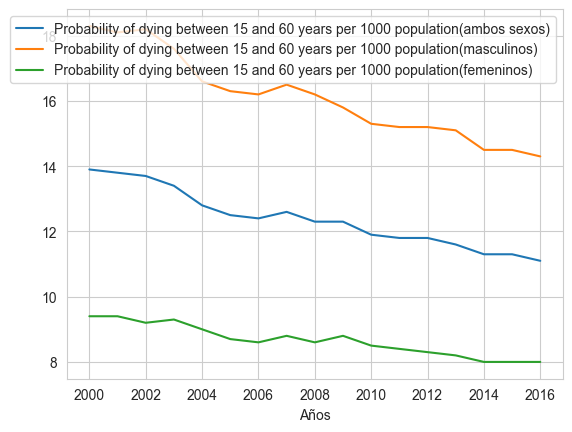

In [91]:
df_argentina = df_mortalidad_adulta.loc[df_mortalidad_adulta['Pais'] == 'Argentina']
df_argentina.plot(x='Años', y=['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)', 'Probability of dying between 15 and 60 years per 1000 population(masculinos)', 'Probability of dying between 15 and 60 years per 1000 population(femeninos)'])
plt.show()


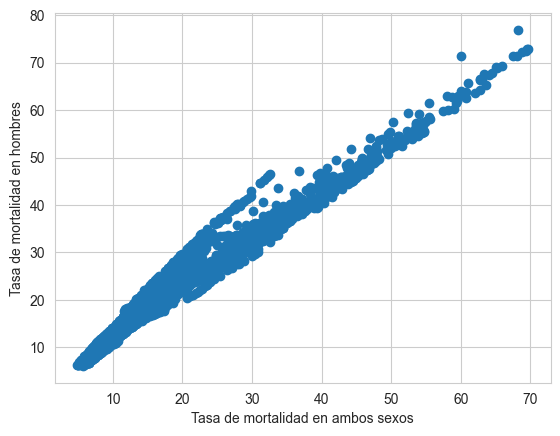

In [92]:
plt.scatter(x=df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'], y=df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(masculinos)'])
plt.xlabel('Tasa de mortalidad en ambos sexos')
plt.ylabel('Tasa de mortalidad en hombres')
plt.show()

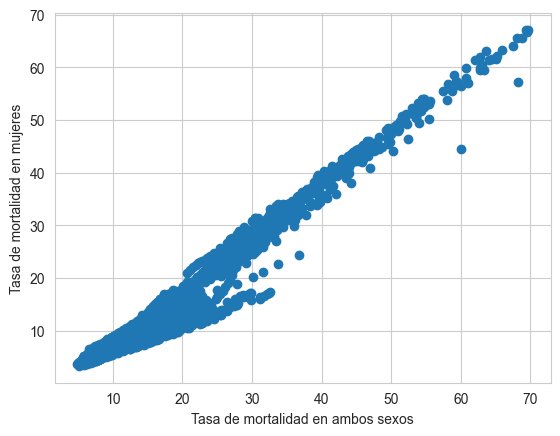

In [93]:
plt.scatter(x=df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'], y=df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(femeninos)'])
plt.xlabel('Tasa de mortalidad en ambos sexos')
plt.ylabel('Tasa de mortalidad en mujeres')
plt.show()

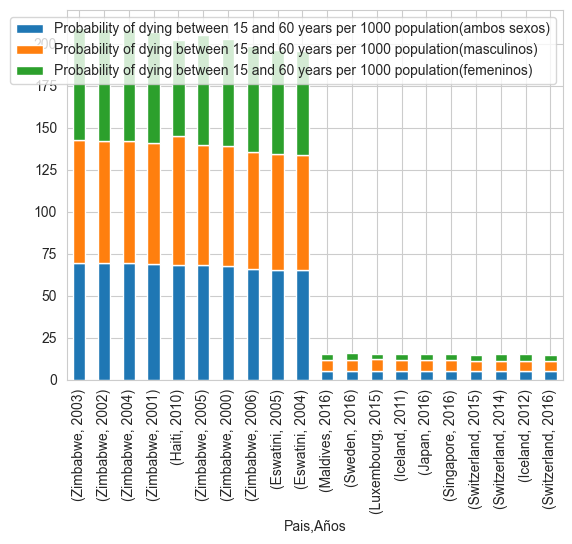

In [94]:
# Agrupapamiento por país y año y se suman las tasas de mortalidad por género
df_mortalidad_total = df_mortalidad_adulta.groupby(['Pais', 'Años'])[['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)',
                                                                     'Probability of dying between 15 and 60 years per 1000 population(masculinos)',
                                                                     'Probability of dying between 15 and 60 years per 1000 population(femeninos)']].sum()
# Se ordenan de mayor a menor
df_mortalidad_total = df_mortalidad_total.sort_values(by=['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'], ascending=False)
# Tomamos los 10 primeros y 10 últimos países
df_mortalidad_total = pd.concat([df_mortalidad_total.head(10), df_mortalidad_total.tail(10)])
df_mortalidad_total.plot(kind='bar', stacked=True)
plt.show()

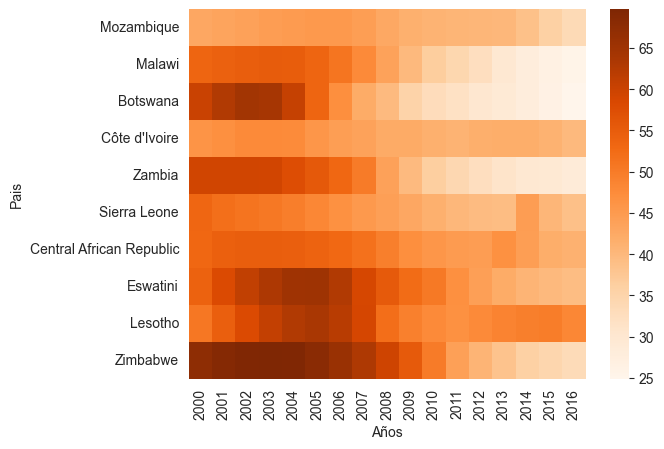

In [95]:
top_paises = df_mortalidad_adulta.groupby('Pais')['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'].sum().sort_values(ascending=False)[:10].index
df_top_paises = df_mortalidad_adulta[df_mortalidad_adulta['Pais'].isin(top_paises)]
df_pivot = df_top_paises.pivot(index='Pais', columns='Años', values='Probability of dying between 15 and 60 years per 1000 population(ambos sexos)')
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).sort_values().index]
sns.heatmap(df_pivot, cmap='Oranges')
plt.show()

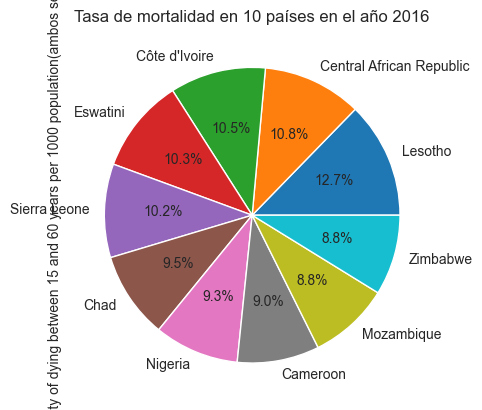

In [96]:
# Filtrado de datos para un año específico
df_mortalidad_año = df_mortalidad_adulta[df_mortalidad_adulta['Años'] == 2016]
# Agrupamiento por país y se suma la tasa de mortalidad total
df_mortalidad_total = df_mortalidad_año.groupby('Pais')['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'].sum()
# Ordenamos de mayor a menor y seleccionamos el top 10
df_mortalidad_total = df_mortalidad_total.sort_values(ascending=False)
df_mortalidad_total = df_mortalidad_total.head(10)

df_mortalidad_total.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tasa de mortalidad en 10 países en el año 2016')
plt.show()



<h2>EDA:</h2>

In [97]:
print(df_mortalidad_adulta.isnull().sum())

Pais                                                                             0
Años                                                                             0
Probability of dying between 15 and 60 years per 1000 population(ambos sexos)    0
Probability of dying between 15 and 60 years per 1000 population(masculinos)     0
Probability of dying between 15 and 60 years per 1000 population(femeninos)      0
dtype: int64


In [98]:
df_mortalidad_adulta.describe()

,Años,Probability of dying between 15 and 60 years per 1000 population(ambos sexos),Probability of dying between 15 and 60 years per 1000 population(masculinos),Probability of dying between 15 and 60 years per 1000 population(femeninos)
count,3111.000000,3111.000000,3111.000000,3111.000000
mean,2008.000000,19.353038,22.754741,15.909225
std,4.899767,11.400243,11.749950,11.570535
min,2000.000000,4.900000,6.100000,3.300000
25%,2004.000000,10.800000,13.700000,7.600000
50%,2008.000000,16.500000,20.800000,11.900000
75%,2012.000000,25.100000,29.200000,21.550000
max,2016.000000,69.700000,76.900000,67.100000


<p>Notar ya cómo se pueden ver las modificaciones entre mínimos y máximos. Y que la media de los valores es más cercana de alguna manera en el transcurso del període de tiempo tomado es más cercana a los mínimos que a los máximos.</p>

C:\Users\saume\AppData\Local\Temp\ipykernel_5108\2941611793.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


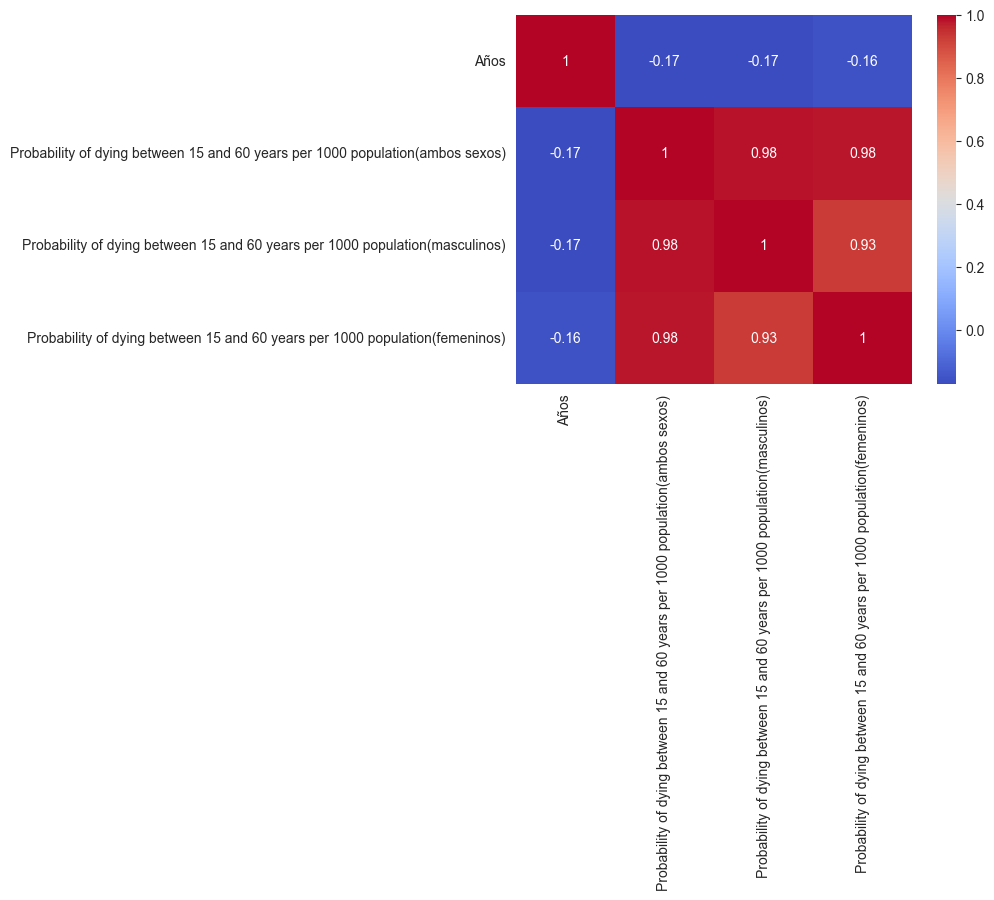

In [99]:
cols = ['Pais', 'Años', 'Probability of dying between 15 and 60 years per 1000 population(ambos sexos)', 'Probability of dying between 15 and 60 years per 1000 population(masculinos)', 'Probability of dying between 15 and 60 years per 1000 population(femeninos)']
df = df_mortalidad_adulta[cols]
# Calcular la matriz de correlación
corr_matrix = df.corr()
# Visualizar el mapa de calor
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

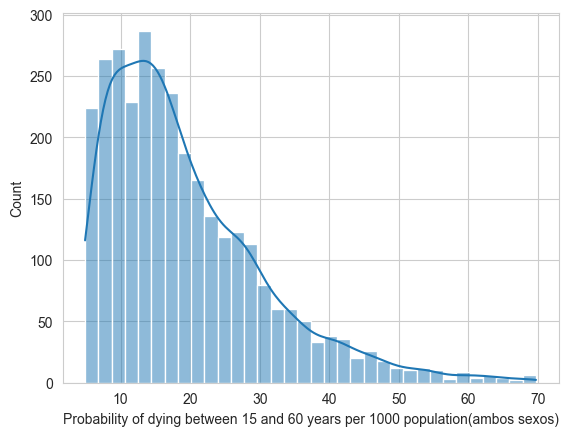

In [100]:
# Seleccionar la columna de interés
columna = 'Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'
# Crear el histograma
sns.histplot(data=df_mortalidad_adulta, x=columna, kde=True)
plt.show()

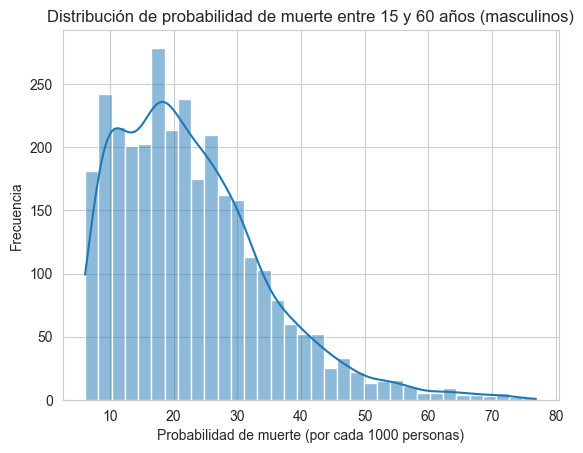

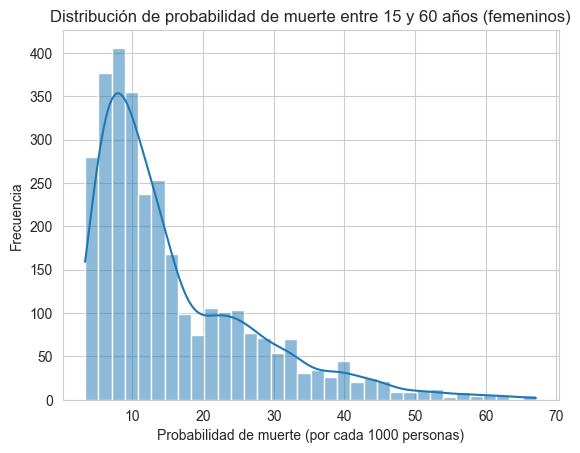

In [101]:
cols = ['Probability of dying between 15 and 60 years per 1000 population(masculinos)', 'Probability of dying between 15 and 60 years per 1000 population(femeninos)']
df_prob_muerte = df[cols]
sns.histplot(df_prob_muerte['Probability of dying between 15 and 60 years per 1000 population(masculinos)'], kde=True)
plt.title('Distribución de probabilidad de muerte entre 15 y 60 años (masculinos)')
plt.xlabel('Probabilidad de muerte (por cada 1000 personas)')
plt.ylabel('Frecuencia')
plt.show()
sns.histplot(df_prob_muerte['Probability of dying between 15 and 60 years per 1000 population(femeninos)'], kde=True)
plt.title('Distribución de probabilidad de muerte entre 15 y 60 años (femeninos)')
plt.xlabel('Probabilidad de muerte (por cada 1000 personas)')
plt.ylabel('Frecuencia')
plt.show()

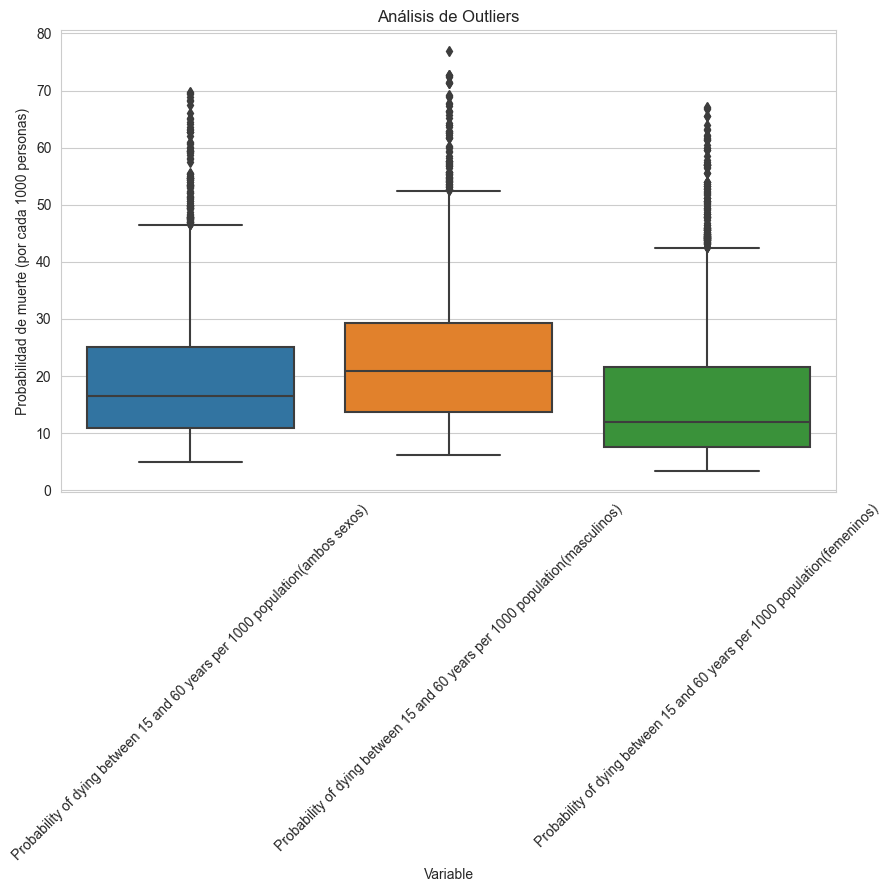

In [102]:
# Seleccionar las columnas relevantes
cols = ['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)',
        'Probability of dying between 15 and 60 years per 1000 population(masculinos)',
        'Probability of dying between 15 and 60 years per 1000 population(femeninos)']
df_prob_muerte = df_mortalidad_adulta[cols]

# Analizar outliers en las columnas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_prob_muerte)
plt.title('Análisis de Outliers')
plt.xlabel('Variable')
plt.ylabel('Probabilidad de muerte (por cada 1000 personas)')
plt.xticks(rotation=45)
plt.show()


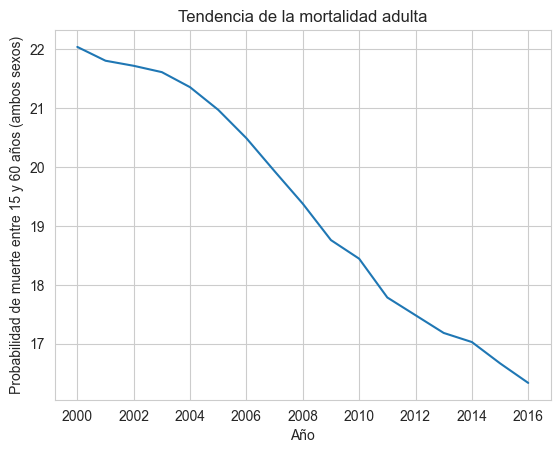

In [103]:
# Seleccionar la columna de interés y agrupar por año
df_subset = df_mortalidad_adulta[['Años', 'Probability of dying between 15 and 60 years per 1000 population(ambos sexos)']]
df_grouped = df_subset.groupby('Años').mean().reset_index()

# Graficar la tendencia de la variable a lo largo del tiempo
plt.plot(df_grouped['Años'], df_grouped['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'])
plt.title('Tendencia de la mortalidad adulta')
plt.xlabel('Año')
plt.ylabel('Probabilidad de muerte entre 15 y 60 años (ambos sexos)')
plt.show()

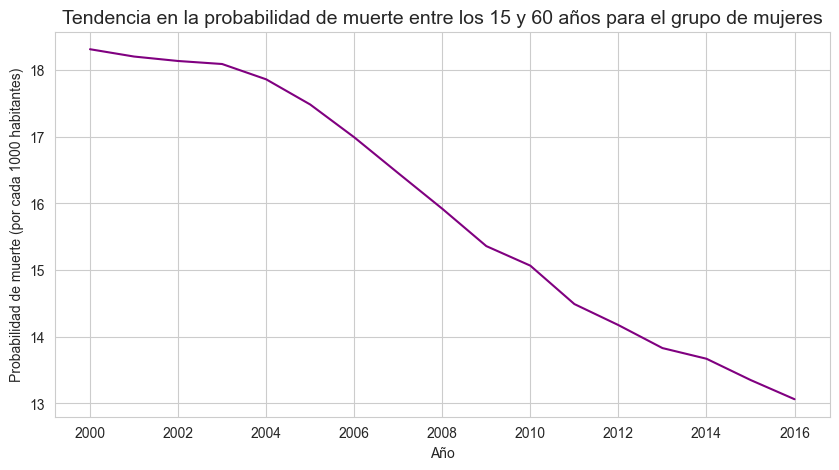

In [104]:
col = 'Probability of dying between 15 and 60 years per 1000 population(femeninos)'
df_subset = df_mortalidad_adulta.groupby('Años')[col].mean().reset_index()

# Graficar la tendencia en un gráfico de línea
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.lineplot(x='Años', y=col, data=df_subset, color='purple')
plt.title(f'Tendencia en la probabilidad de muerte entre los 15 y 60 años para el grupo de mujeres', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Probabilidad de muerte (por cada 1000 habitantes)')
plt.show()

<p>Supongamos que queremos crear un modelo que me permita clasificar países según su tasa de mortalidad en bajo, medio y alto. Por lo tanto, lo que haremos será utilizar un modelo de clasificación(en este caso un arból de decisión) que me permita realizar dicha clasificación.</p>

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

promedio_mortalidad = df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'].mean()

# Crear una nueva columna 'Clase_mortalidad' basada en la tasa de mortalidad promedio
df_mortalidad_adulta.loc[df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'] > promedio_mortalidad, 'Clase_mortalidad'] = 'Alta'
df_mortalidad_adulta.loc[df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'] < promedio_mortalidad, 'Clase_mortalidad'] = 'Baja'
df_mortalidad_adulta.loc[df_mortalidad_adulta['Probability of dying between 15 and 60 years per 1000 population(ambos sexos)'] == promedio_mortalidad, 'Clase_mortalidad'] = 'Media'
# Definir las variables de entrada (X) y la variable objetivo (y)
X = df_mortalidad_adulta[['Años', 'Probability of dying between 15 and 60 years per 1000 population(ambos sexos)']]
y = df_mortalidad_adulta['Clase_mortalidad']  # Reemplaza 'Clase_mortalidad' por la columna que contiene las clases

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo de clasificación con árbol de decisión
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Evaluar el modelo utilizando la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 1.0


<p>Vamos a corroborar que el modelo no este teniendo un overfitting ya que el valor de accuracy ha dado 1 en el código de arriba.</p>

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Matriz de confusión:
[[626   0]
 [  0 930]]
Reporte de clasificación:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00       626
        Baja       1.00      1.00      1.00       930

    accuracy                           1.00      1556
   macro avg       1.00      1.00      1.00      1556
weighted avg       1.00      1.00      1.00      1556



<p>Aquí vemos que el modelo muy probablemente este pasando por un overfitting.</p>